<a href="https://colab.research.google.com/github/lxhwww/machine-learning-for-covid-19/blob/main/ex1_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import&data

In [ ]:
#Imports
#import xenaPython as xena
from statistics import median, mean
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.impute import SimpleImputer 
from sklearn import svm
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from imblearn.ensemble import BalancedBaggingClassifier, RUSBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
import seaborn as sns
import warnings
from pylab import rcParams
from scipy.stats import f_oneway
from scipy.stats import ttest_ind
from collections import Counter
import re
from keras.utils import np_utils
print( "--- Imports Successful ---")


--- Imports Successful ---


In [ ]:
#read data
df_chunk = pd.read_csv('/content/drive/MyDrive/GSE174818_matrix_processed.csv', chunksize=100000, iterator = True) #使用chunksize分块读取大型csv文件，这里每次读取chunksize为100万

chunk_list = [] 

for chunk in df_chunk:
    chunk_list.append(chunk)

df_data = pd.concat(chunk_list) #再把这些块组合成一个DataFrame
print(df_data.shape)
df_data.head(10)

#delete pval
cols=df_data.columns
cols=list(cols)

y_label=[]
x_data=[]

for i in range(len(cols)):
  if i%2==1:
    df_data.drop([cols[i]],axis=1,inplace=True)
  
print(df_data.shape)
df_data.head(10)

#fillna
df_data.fillna(value=0,inplace=True)
df_data.isnull().sum()


#generate
reg=r"N"
y_label=[]
x_data=[]
x_covid=[]

cols_data=df_data.columns
cols_data=list(cols_data)

count=0
for j in range(len(cols_data)):
  if re.search(reg,cols_data[j])==None:
    y_label.append(1)
    count+=1
    x_covid.append(list(df_data.iloc[:,j]))
  else:
    y_label.append(0)
  x_data.append(list(df_data.iloc[:,j]))

print(y_label)
print(np.asarray(x_data).shape)
print(count)


ParserError: ignored

In [ ]:
#to array
y_label=np.asarray(y_label)
x_data=np.asarray(x_data)
print(y_label.shape,x_data.shape)

(128,) (128, 865859)


In [ ]:
df_data.rename(columns={'C100.1':'C10'},inplace=True)#修改列名

df_sev = pd.read_csv('/content/drive/MyDrive/IndividualCovidGRAM.csv')
df_sev.columns
df_sev.loc[(df_sev['Albany_sampleID']=='C21 and C54'),'Albany_sampleID']='C21'#修改列名

In [ ]:
s1=df_data.columns.tolist()
s2=df_sev['Albany_sampleID'].tolist()
s1, s2 = set(s1), set(s2)
s2-(s2&s1)

set()

In [ ]:
t=[x for x in s1 if x in s2]
x_covid=[]
y_sev=[]
for x in t:
  x_covid.append(list(df_data[x]))
  y_sev.append(list(df_sev[(df_sev['Albany_sampleID']==x)]['Covid-GRAM Risk Group']))


x_covid=np.asarray(x_covid)
y_sev=np.asarray(y_sev)

print(x_covid.shape)
print(y_sev.shape)

(102, 865859)
(102, 1)


In [ ]:
#标签化severity
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit(y_sev.tolist())
# transform 以后，这一列数就变成了 [0,  n-1] 这个区间的数，即是  le.classes_ 中的索引
y_sev_label=le.transform(y_sev.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# read RNA

In [ ]:
#读rns数据
df_chunk = pd.read_csv('/content/drive/MyDrive/1.csv', chunksize=100000, iterator = True) #使用chunksize分块读取大型csv文件，这里每次读取chunksize为100万

chunk_list = [] 

for chunk in df_chunk:
    chunk_list.append(chunk)

df_data_RNA = pd.concat(chunk_list) #再把这些块组合成一个DataFrame
print(df_data_RNA.shape)
df_data_RNA.head(10)


#delete pval
cols=df_data_RNA.columns
cols=list(cols)


#fillna
df_data_RNA.fillna(value=0,inplace=True)
df_data_RNA.isnull().sum()


df_data_RNA.head(10)


(30185, 54)


,507-V,1189-V,1406-V,1918-V,1951-V,1995-V,2064-V,3054-V,3136-V,3538-V,...,81,82,83,84,85,87,91,92,95,101
0,14.070559,13.798071,13.581000,13.501768,13.439851,12.903939,13.287856,13.033640,13.900911,13.333453,...,12.779625,12.960987,13.511849,13.884385,13.723434,14.082154,12.701183,13.171894,13.335847,13.305619
1,13.928768,13.768303,11.265803,14.073185,12.488195,13.381280,12.850765,13.140272,13.381280,9.680840,...,13.382329,14.435749,12.002780,14.436251,13.928789,14.725444,13.381280,13.768794,13.140545,13.768303
2,13.949530,12.926018,13.130841,12.218066,12.748996,13.277281,13.024633,12.918938,12.530818,12.748998,...,12.045388,12.798751,13.761597,13.105930,13.761598,12.588533,13.904791,12.342374,11.559963,12.273657
3,13.180418,13.028500,12.681845,12.038974,10.743518,13.604989,11.393788,12.644491,13.262656,13.972909,...,13.359914,14.055795,14.333685,14.533926,13.982778,14.357402,13.258881,13.355466,13.581636,13.926458
4,16.122646,14.470176,14.723095,13.906649,13.461510,15.058014,13.715828,13.931961,14.693802,13.594265,...,11.173934,11.730327,13.017207,14.678928,13.017207,14.163286,12.512734,10.786910,12.040665,12.578321
5,13.849207,10.790313,12.664782,13.112241,9.205350,10.790313,12.664782,9.205350,12.375275,9.205350,...,15.834707,14.063331,13.960238,15.545200,15.681084,15.681084,15.136088,12.664782,14.631615,12.905790
6,11.701272,10.322760,10.808187,12.088295,10.322760,10.322760,9.585794,9.585794,12.088295,9.585794,...,13.358384,11.170757,8.000832,11.170757,8.000832,8.000832,8.000832,8.000832,8.000832,12.755719
7,11.854753,11.854753,11.854753,11.854753,11.854753,13.439715,13.439715,13.439715,13.439715,15.314185,...,14.176681,16.102680,11.854753,15.555193,13.439715,11.854753,11.854753,11.854753,11.854753,16.247070
8,13.632979,13.649695,13.258536,13.503150,13.429112,13.623898,13.653525,13.261884,13.411125,13.597630,...,12.417896,13.454216,13.657344,13.483201,13.787372,13.468782,14.302699,12.779800,13.063133,13.271888
9,13.604221,13.868548,13.389481,13.483627,13.322409,13.270727,13.652166,13.297420,13.489394,13.597905,...,12.475918,13.504521,13.873533,13.805276,13.936141,13.872077,13.991574,13.181835,12.890172,13.287888


In [ ]:
#generate
y_label_RNA=[]
x_data_RNA=[]


reg=r"V"
y_label_RNA=[]
x_data_RNA=[]

cols_data_RNA=df_data_RNA.columns
cols_data_RNA=list(cols_data_RNA)

count=0
for j in range(len(cols_data_RNA)):
  if re.search(reg,cols_data_RNA[j])==None:
    y_label_RNA.append(1)
    count+=1
    #x_covid.append(list(df_data.iloc[:,j]))
  else:
    y_label_RNA.append(0)
  x_data_RNA.append(list(df_data_RNA.iloc[:,j]))

print(y_label_RNA)
x_data_RNA=np.asarray(x_data_RNA)
print(np.asarray(x_data_RNA).shape)
print(count)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
(54, 30185)
44


# Protein

In [ ]:
df_pm = pd.read_csv('/content/drive/MyDrive/Prot_and_meta_matrix.csv') 
print(df_pm.shape)
df_pm.head(1639)

df_pm.fillna(value=0,inplace=True)

(1639, 31)


In [ ]:
y_label_pm=[]
x_data_pm=[]

y_label_pm=[]
x_data_pm=[]

cols_data_pm=df_pm.columns
cols_data_pm=list(cols_data_pm)

count=0
for j in range(len(cols_data_pm)):
  y_label_pm.append(list(df_pm.iloc[1638:,j]))
  x_data_pm.append(list(df_pm.iloc[:1638,j]))

print(y_label_pm)
y_label_pm=np.asarray(y_label_pm)
x_data_pm=np.asarray(x_data_pm)
print(np.asarray(x_data_pm).shape)


[[0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0]]
(31, 1638)


In [ ]:
df_pm_c2 = pd.read_csv('/content/drive/MyDrive/Prot_and_meta_matrix_C2.csv') 
print(df_pm_c2.shape)
df_pm_c2.head()

df_pm_c2.fillna(value=0,inplace=True)

(1590, 10)


In [ ]:
y_label_pm_c2=[]
x_data_pm_c2=[]

cols_data_pm_c2=df_pm_c2.columns
cols_data_pm_c2=list(cols_data_pm_c2)

count=0
for j in range(len(cols_data_pm_c2)):
  y_label_pm_c2.append(list(df_pm_c2.iloc[1589:,j]))
  x_data_pm_c2.append(list(df_pm_c2.iloc[:1589,j]))

print(y_label_pm_c2)
y_label_pm_c2=np.asarray(y_label_pm_c2)
x_data_pm_c2=np.asarray(x_data_pm_c2)
print(np.asarray(x_data_pm_c2).shape)


[[0.0], [0.0], [0.0], [1.0], [1.0], [0.0], [0.0], [0.0], [1.0], [1.0]]
(10, 1589)


In [ ]:
df_data_proteins_test= pd.read_csv('/content/drive/MyDrive/Proteomics_proteins_test_CSV.csv') #使用chunksize分块读取大型csv文件，这里每次读取chunksize为100万

print(df_data_proteins_test.shape)


for i in range(23,30):
    df_data_proteins_test.drop([cols[i]],inplace=True)

df_data_proteins_test.head(50)

(1638, 31)


KeyError: ignored

# PCA

In [ ]:
#feature extraction PCA,for severity
from sklearn.decomposition import PCA  
from pandas.core.frame import DataFrame

pca_sk = PCA(n_components=100)
newMat_sev = pca_sk.fit_transform(x_covid)  

data2 = DataFrame(newMat_sev)
data2.head(10)

NameError: ignored

In [ ]:
#feature extraction PCA,for severity
from sklearn.decomposition import PCA  
from pandas.core.frame import DataFrame

pca_sk = PCA(n_components=50)
newMat_RNA = pca_sk.fit_transform(x_data_RNA)  

data_3 = DataFrame(newMat_RNA)
data_3.head(10)
data_3.shape

(54, 50)

In [ ]:
#feature extraction PCA
from sklearn.decomposition import PCA  
from pandas.core.frame import DataFrame

pca_sk = PCA(n_components=100)
newMat = pca_sk.fit_transform(x_data)  

data1 = DataFrame(newMat)
data1.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,70.424070,0.027162,-8.611878,-11.296879,-1.576333,9.905973,8.678106,4.887482,-1.357985,-6.216125,...,-2.220217,1.828585,1.206632,0.201295,-2.997471,1.968226,1.393618,-1.694209,-1.013953,1.902540
1,21.502568,7.586904,-26.610598,-0.076713,-0.696440,-2.924814,-3.134700,1.274345,0.026485,-1.952106,...,-3.140704,-5.189980,-3.677689,0.588202,0.994783,0.480879,1.910200,1.606191,2.050419,-2.228954
2,27.067539,18.755577,5.471773,-1.512824,-2.092358,-3.525617,-4.624186,1.295705,-1.186529,-3.365394,...,1.277135,7.729726,2.783378,3.070216,6.304978,-1.397202,-6.411205,-1.315237,5.855553,3.586756
3,32.867180,-4.668383,-13.184994,1.957165,-3.194763,2.939815,4.932708,8.012296,-2.162859,-3.062727,...,1.928474,1.935955,-1.019117,-8.491985,-1.782772,0.231474,-4.904790,3.800996,0.379552,3.321249
4,2.498947,17.805380,0.042026,-1.539490,-3.107372,-1.783666,-4.114646,6.555326,-0.361649,3.324415,...,-0.080788,-4.483116,0.312291,0.163893,0.829209,-2.795150,-2.836590,-0.378488,0.099091,0.225342
5,6.163955,11.477141,7.494331,5.592167,-3.235964,-3.393347,-2.996309,4.886870,-1.277777,0.316791,...,-1.071715,-2.753847,-1.861379,-1.718836,-1.063619,-1.857000,-3.156151,-0.677290,0.640762,-1.277704
6,30.864834,-23.955449,5.063940,5.776237,-3.788845,-3.842123,-5.898905,3.427456,0.235979,1.056285,...,-3.230414,7.003517,2.678313,1.179281,-2.456651,-2.782989,5.130361,-4.841263,1.639696,-0.213652
7,19.273341,-11.217911,-12.209465,1.384818,-0.657038,-1.123660,-1.940782,5.635521,1.189560,0.722865,...,-0.463278,0.016870,0.918023,0.482697,-0.181996,2.372150,-0.659196,0.815262,-0.176372,-0.017767
8,33.213828,10.953101,14.400820,4.567252,-3.243584,-5.928109,-5.830744,-3.801369,-1.664601,-0.730666,...,0.502114,-0.803812,0.603394,-1.555515,0.217666,0.691781,0.535760,1.609902,-1.115356,-0.896995
9,1.595732,15.824697,1.247105,-5.528160,1.611676,-2.935285,-4.921876,3.973000,1.242139,-1.178363,...,-1.377523,-1.365289,-0.818178,-0.809576,0.664194,-0.854454,2.645029,0.476212,0.316193,0.866320


In [ ]:
data1.shape

(128, 100)

In [ ]:
#feature extraction PCA
from sklearn.decomposition import PCA  
from pandas.core.frame import DataFrame

pca_sk = PCA(n_components=10)
newMat_pm = pca_sk.fit_transform(x_data_pm)  

data1 = DataFrame(newMat_pm)
data1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-1.506223,4.941293,-12.145561,-12.717628,-8.381940,1.768469,-4.320300,1.458537,-3.641046,12.620717
1,-6.511002,1.888006,-19.096101,-9.195652,0.770401,-8.833153,0.886853,10.651408,11.980405,-2.048504
2,-3.281161,-1.488949,9.339293,-1.358326,-0.530648,-6.507844,-6.427221,3.601074,-1.243163,-2.445833
3,-4.083976,3.832610,11.235773,-2.028257,1.196753,-12.796828,-1.860877,11.188882,0.379290,12.553828
4,3.921686,-9.364057,10.836048,-13.261133,0.446717,-6.727777,-3.639084,0.165564,-2.391553,16.111234
5,3.699987,-20.871125,-0.121494,-3.604278,-9.346621,-8.595697,-5.064906,-5.670873,13.170855,-9.200022
6,2.166755,4.721834,12.354983,0.007537,-11.826883,0.381970,-3.641086,-10.216622,2.304482,-7.545882
7,62.366266,14.330558,-6.262381,19.162952,3.945281,-4.104920,-7.669346,2.437832,6.260088,4.897240
8,-5.523902,38.602066,5.258477,-18.840640,18.801235,3.293863,-3.636519,-7.714512,7.107791,-6.926707
9,0.835655,10.300563,19.887098,2.258253,4.754845,-2.956959,8.829932,4.109268,-4.517253,-6.286026


In [ ]:
#feature extraction PCA
from sklearn.decomposition import PCA  
from pandas.core.frame import DataFrame

pca_sk = PCA()
newMat_pm_c2 = pca_sk.fit_transform(x_data_pm_c2)  

data1 = DataFrame(newMat_pm_c2)
data1.head(10)

,0,1,2,3,4,5,6,7,8,9
0,-35.189676,-12.550456,0.136819,8.419146,-4.493815,-2.130318,-6.988130,23.955868,-7.417188,6.900235e-14
1,-36.263095,-8.457660,-8.500223,0.741427,-1.386311,-21.548427,18.672219,-4.514375,-7.430341,6.900235e-14
2,-36.612429,-11.213587,-13.974586,-13.844898,-5.632191,1.486171,4.337490,5.354534,20.391623,6.900235e-14
3,-34.140867,-15.347789,43.067791,2.116929,7.449036,3.035105,5.090911,-1.614669,4.169785,6.900235e-14
4,-35.814838,-16.743412,2.687118,-25.299704,-11.153988,-2.557568,-15.685029,-9.873125,-6.979084,6.900235e-14
5,30.558776,69.111961,4.446718,10.551713,-22.828167,7.898143,3.767745,-2.996065,-0.470444,6.900235e-14
6,-23.628299,-17.243764,-9.961184,30.953780,5.050615,-4.581027,-12.561217,-10.262196,5.312054,6.900235e-14
7,29.024631,69.502767,-3.118840,-10.506331,22.963909,-6.693053,-5.489940,2.209919,0.366466,6.900235e-14
8,-30.272834,-14.875982,-14.898445,-1.165197,10.552572,26.007528,7.782171,-3.163731,-7.929733,6.900235e-14
9,172.338631,-42.182077,0.114832,-1.966864,-0.521660,-0.916555,1.073780,0.903841,-0.013140,6.900235e-14


# kmeans

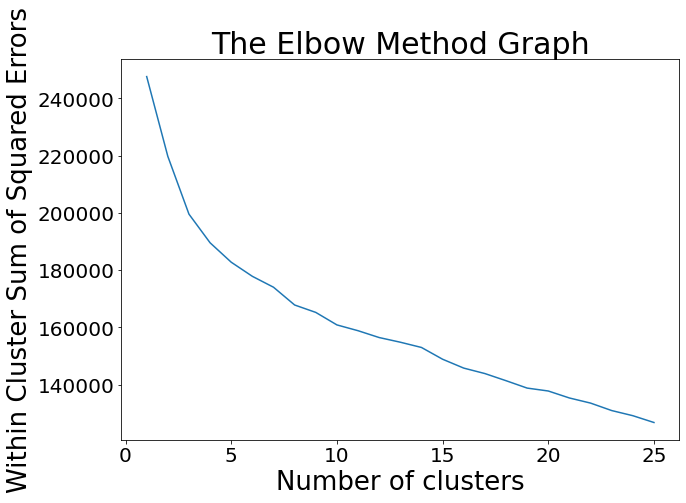

In [ ]:
# function returns WSS score for k values from 1 to kmax
sse = []
kmax = 25
for i in range(1,kmax+1): 
    kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=2000, n_init=10,random_state=40 )
    kmeans.fit(x_data)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(x_data)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(x_data)):
        curr_center = np.array(centroids[pred_clusters[i]])
        curr_point = x_data[i]
        curr_sse += sum((curr_point-curr_center)**2)
        
    sse.append(curr_sse)

plt.figure(figsize=(10,7))     
plt.xticks(fontsize= 20)
plt.yticks(fontsize= 20)
plt.plot(range(1,kmax+1),sse)
plt.title('The Elbow Method Graph',fontsize= 30)
plt.xlabel('Number of clusters',fontsize= 26)
plt.ylabel('Within Cluster Sum of Squared Errors',fontsize= 26)
#plt.savefig("elbow.pdf")
plt.show()

In [ ]:
#t-sne
from sklearn.manifold import TSNE
# 嵌入空间的维度为2，即将数据降维成2维
ts = TSNE(n_components=3)
# 训练模型
ts.fit_transform(newMat)
# 打印结果
#print(ts.embedding_)
ttest=np.asarray(ts.embedding_)
print(ttest.shape)

(128, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(31, 3)


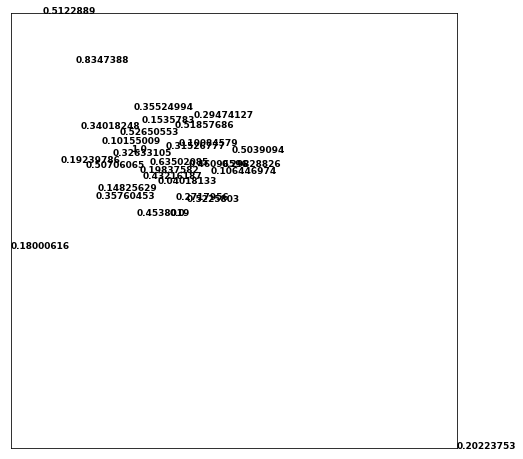

In [ ]:
#t-sne
from sklearn.manifold import TSNE
# 嵌入空间的维度为2，即将数据降维成2维
ts = TSNE(n_components=3)
# 训练模型
X_tsne=ts.fit_transform(newMat_pm)
# 打印结果
#print(ts.embedding_)
ttest=np.asarray(ts.embedding_)
print(ttest.shape)


x_min, x_max = X_tsne.min(0), X_tsne.max(0)
X_norm = (X_tsne - x_min) / (x_max - x_min)  # 归一化
plt.figure(figsize=(8, 8))
for i in range(X_norm.shape[0]):
    plt.text(X_norm[i, 0], X_norm[i, 1], X_norm[i, 2],
             fontdict={'weight': 'bold', 'size': 9})
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#K_mean
from sklearn.cluster import KMeans
cluster=KMeans(n_clusters=20).fit(ttest)

kmeans = KMeans(n_clusters=18, init ='k-means++', max_iter=2000,  n_init=10, random_state=40 )
kmeans.fit_predict(ttest)
# save the clustered labels
data_cluster = pd.DataFrame(kmeans.labels_,columns=["clusterid"])
data_cluster['tsne-2d-one'] = ttest[:,0]
data_cluster['tsne-2d-two'] = ttest[:,1]
data_cluster['tsne-2d-three'] = ttest[:,2]

data_cluster
ttest.shape

#画图
sns.set_style("white")
plt.figure(figsize=(10,7))

sns.set(font_scale=1.1)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="clusterid",
    palette=sns.color_palette("hls", 18),
    data=data_cluster,
    legend="full",
    alpha=0.5,
)

centroid=cluster.cluster_centers_
centroid # 查看质心

centroid.shape
newC=centroid.T
newC.shape

# copy data(not used)

In [ ]:
remain_data=newMat_sev[0:30]
newMat_sev_m=newMat_sev[30:]
newMat_sev_m.shape
large_x=np.vstack((newMat_sev_m,newMat_sev_m))
large_x=np.vstack((large_x,large_x))
print(large_x.shape)

(288, 100)


In [ ]:
remain_data_y=y_sev_label[0:30]
y_sev_label_m=y_sev_label[30:]
y_sev_label_m.shape
large_y=np.concatenate((y_sev_label_m,y_sev_label_m))
large_y=np.concatenate((large_y,large_y))
large_y.shape

(288,)

# MLP for two task

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
 
auc=[]
accu=[]
f1=[]

X=newMat_RNA#x_datalarge_x#x_covid##newC#newMat#x_data
y=y_label_RNA
input_shape=X.shape[1]

sf=StratifiedKFold(n_splits=3, random_state=1, shuffle=True)

for train_ix , test_ix in sf.split(X, y):

  
  model = Sequential()
  model.add(Dense(128, input_dim=input_shape, activation='sigmoid'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='sigmoid'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='sigmoid'))
  model.add(Dense(3,activation='softmax'))
 
  model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

  train_x,test_x = X[train_ix],X[test_ix]
  train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]
  #train_y= np_utils.to_categorical(train_y,3)
  #test_y = np_utils.to_categorical(test_y,3)

  oversample=SMOTE()
  train_x,train_y=oversample.fit_resample(train_x, train_y)
  model.fit(train_x,train_y,epochs=40,batch_size=10,verbose=0)

  y_pred=model.predict(test_x,batch_size=10)
  y_pred-np.asarray(y_pred)

  score = model.evaluate(test_x,test_y, batch_size=20)
  auc.append(score[1])
  f1=f1_score(test_y,y_pred.round(),average='micro')
  accu.append(f1)

auc=mean(auc)
accu=np.asarray(accu)
accu=mean(accu)

#remain_data_y_cate=np_utils.to_categorical(remain_data_y,3)
score_test=model.evaluate(remain_data,remain_data_y_cate,batch_size=10)

print("test_score:loss&accuracy",score_test)
print('accuracy',auc)
print('f1',accu)

ValueError: ignored

In [ ]:
#MLP for RNA
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

auc=[]
accu=[]
f1score=[]
C_sum=np.zeros((2,2))

X=x_data_RNA#newMat_RNA##x_datalarge_x#x_covid##newC#newMat#x_data#newMat_RNA
y=y_label_RNA
input_shape=X.shape[1]

n_splits_num=5
sf=StratifiedKFold(n_splits=n_splits_num,random_state=1,shuffle=True)

for train_ix , test_ix in sf.split(X, y):

  model = Sequential()
  model.add(Dense(256, input_dim=input_shape, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='sigmoid'))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(1,activation='sigmoid'))
 
  model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

  train_x,test_x = X[train_ix],X[test_ix]
  train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]

  oversample=SMOTE()
  train_x,train_y=oversample.fit_resample(train_x, train_y)
  model.fit(train_x,train_y,epochs=20,batch_size=5,verbose=1)


  score = model.evaluate(test_x,test_y, batch_size=5)
  y_pred=model.predict(test_x,batch_size=5)
  y_pred-np.asarray(y_pred)
  
  accuracy=accuracy_score(test_y,y_pred.round())
  f1=f1_score(test_y,y_pred.round())
  C=confusion_matrix(test_y,y_pred.round())

  C_sum+=C
  print('C',C)

  f1score.append(f1)
  accu.append(f1)
  auc.append(score[1])
  

auc=mean(auc)
accu=np.asarray(accu)
accu=mean(accu)
f1score=mean(f1score)

print('auc',auc)
print('f1',f1score)
print('accu',accu)

print(C_sum)
print(C_sum/n_splits_num)




Epoch 1/20
14/14 [==============================] - 1s 44ms/step - loss: 0.7867 - accuracy: 0.5000
Epoch 2/20
14/14 [==============================] - 1s 42ms/step - loss: 0.7088 - accuracy: 0.4286
Epoch 3/20
14/14 [==============================] - 1s 43ms/step - loss: 0.6952 - accuracy: 0.5286
Epoch 4/20
14/14 [==============================] - 1s 52ms/step - loss: 0.7031 - accuracy: 0.4000
Epoch 5/20
14/14 [==============================] - 1s 52ms/step - loss: 0.7053 - accuracy: 0.4429
Epoch 6/20
14/14 [==============================] - 1s 45ms/step - loss: 0.7052 - accuracy: 0.3429
Epoch 7/20
14/14 [==============================] - 1s 54ms/step - loss: 0.7015 - accuracy: 0.3857
Epoch 8/20
14/14 [==============================] - 1s 67ms/step - loss: 0.7021 - accuracy: 0.4429
Epoch 9/20
14/14 [==============================] - 1s 61ms/step - loss: 0.6987 - accuracy: 0.5429
Epoch 10/20
14/14 [==============================] - 1s 41ms/step - loss: 0.7015 - accuracy: 0.4286
Epoch 11/

In [ ]:
#mlp for pm
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

auc=[]
accu=[]
f1=[]

X=newMat_pm#x_data_pm#x_datalarge_x#x_covid##newC#newMat#x_data
y=y_label_pm
input_shape=X.shape[1]

model = Sequential()
model.add(Dense(64, input_dim=input_shape, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

oversample=SMOTE()
train_x,train_y=oversample.fit_resample(X,y)
model.fit(train_x,train_y,epochs=30,batch_size=5,verbose=1)

score = model.evaluate(train_x,train_y, batch_size=5)
print(score)



Epoch 1/30
8/8 [==============================] - 1s 2ms/step - loss: 0.7328 - accuracy: 0.4444
Epoch 2/30
8/8 [==============================] - 0s 2ms/step - loss: 0.7179 - accuracy: 0.4444
Epoch 3/30
8/8 [==============================] - 0s 2ms/step - loss: 0.7014 - accuracy: 0.5000
Epoch 4/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6840 - accuracy: 0.6111
Epoch 5/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5833
Epoch 6/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6851 - accuracy: 0.5000
Epoch 7/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6659 - accuracy: 0.6667
Epoch 8/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6545 - accuracy: 0.7500
Epoch 9/30
8/8 [==============================] - 0s 2ms/step - loss: 0.6446 - accuracy: 0.6944
Epoch 10/30
8/8 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.6389
Epoch 11/30
8/8 [======================

In [ ]:
y_pred=model.predict(newMat_pm_c2)
y_pred-np.asarray(y_pred)

accuracy=accuracy_score(y_label_pm_c2,y_pred.round())
f1=f1_score(y_label_pm_c2,y_pred.round())
print(f1)
print(accuracy)

0.4444444444444445
0.5


In [ ]:
#MLP for RNA
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

auc=[]
accu=[]
f1=[]

X=newMat_RNA#x_datalarge_x#x_covid##newC#newMat#x_data
y=y_label_RNA
input_shape=X.shape[1]

sf=StratifiedKFold(n_splits=10,random_state=1,shuffle=True)

for train_ix , test_ix in sf.split(X, y):

  model = Sequential()
  model.add(Dense(64, input_dim=input_shape, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='sigmoid'))
  model.add(Dense(1,activation='sigmoid'))
 
  model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

  train_x,test_x = X[train_ix],X[test_ix]
  train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]

  oversample=SMOTE()
  train_x,train_y=oversample.fit_resample(train_x, train_y)
  model.fit(train_x,train_y,epochs=20,batch_size=5,verbose=1)


  score = model.evaluate(test_x,test_y, batch_size=5)
  y_pred=model.predict(test_x,batch_size=5)
  y_pred-np.asarray(y_pred)
  
  accuracy=accuracy_score(test_y,y_pred.round())
  f1=f1_score(test_y,y_pred.round())

  accu.append(accuracy)
  f1.append(f1)
  auc.append(score[1])
  

auc=mean(auc)
accu=np.asarray(accu)
accu=mean(accu)

print('accuracy',auc)
print('f1',accu)

Epoch 1/20
16/16 [==============================] - 1s 2ms/step - loss: 0.7249 - accuracy: 0.5000
Epoch 2/20
16/16 [==============================] - 0s 2ms/step - loss: 0.6315 - accuracy: 0.7308
Epoch 3/20
16/16 [==============================] - 0s 2ms/step - loss: 0.5801 - accuracy: 0.9487
Epoch 4/20
16/16 [==============================] - 0s 2ms/step - loss: 0.5008 - accuracy: 0.9872
Epoch 5/20
16/16 [==============================] - 0s 2ms/step - loss: 0.4197 - accuracy: 0.9872
Epoch 6/20
16/16 [==============================] - 0s 2ms/step - loss: 0.3388 - accuracy: 1.0000
Epoch 7/20
16/16 [==============================] - 0s 2ms/step - loss: 0.2600 - accuracy: 1.0000
Epoch 8/20
16/16 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 1.0000
Epoch 9/20
16/16 [==============================] - 0s 2ms/step - loss: 0.1516 - accuracy: 1.0000
Epoch 10/20
16/16 [==============================] - 0s 2ms/step - loss: 0.1033 - accuracy: 1.0000
Epoch 11/20
16/16 [

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
 
auc=[]
accu=[]
f1=[]

X=large_x#x_covid##newC#newMat#x_data
y=large_y
input_shape=X.shape[1]

sf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_ix , test_ix in sf.split(X, y):

  
  model = Sequential()
  model.add(Dense(128, input_dim=input_shape, activation='sigmoid'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='sigmoid'))
  model.add(Dropout(0.5))
  model.add(Dense(64, activation='sigmoid'))
  model.add(Dense(3,activation='softmax'))
 
  model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

  train_x,test_x = X[train_ix],X[test_ix]
  train_y,test_y = y[train_ix],y[test_ix]
  train_y= np_utils.to_categorical(train_y,3)
  test_y = np_utils.to_categorical(test_y,3)

  oversample=SMOTE()
  train_x,train_y=oversample.fit_resample(train_x, train_y)
  model.fit(train_x,train_y,epochs=40,batch_size=10,verbose=0)
  y_pred=model.predict(test_x,batch_size=10)
  y_pred-np.asarray(y_pred)

  score = model.evaluate(test_x,test_y, batch_size=20)
  auc.append(score[1])
  f1=f1_score(test_y,y_pred.round(),average='micro')
  print('acc',f1)
  accu.append(f1)

auc=mean(auc)
accu=np.asarray(accu)
accu=mean(accu)

remain_data_y_cate= np_utils.to_categorical(remain_data_y,3)
score_test=model.evaluate(remain_data,remain_data_y_cate,batch_size=10)
print("test_score:loss&accuracy",score_test)

print('accuracy',auc)
print('f1',accu)

3/3 [==============================] - 0s 3ms/step - loss: 5.6522e-07 - accuracy: 1.0000
acc 1.0
3/3 [==============================] - 0s 3ms/step - loss: 2.3225e-07 - accuracy: 1.0000
acc 1.0
3/3 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 1.0000
acc 1.0
3/3 [==============================] - 0s 3ms/step - loss: 1.6041e-06 - accuracy: 1.0000
acc 1.0
3/3 [==============================] - 0s 4ms/step - loss: 0.0323 - accuracy: 1.0000
acc 1.0
3/3 [==============================] - 0s 3ms/step - loss: 2.5059 - accuracy: 0.7667
test_score:loss&accuracy [2.50594425201416, 0.7666666507720947]
accuracy 1.0
f1 1.0


In [ ]:
#MLP for covid
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score

auc=[]
accu=[]
f1=[]

X=newMat_RNA#newMat#newC#newMat#x_data
y=y_label_RNA#y_label
input_shape=X.shape[1]

sf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)

for train_ix , test_ix in sf.split(X, y):

  model = Sequential()
  model.add(Dense(128, input_dim=input_shape, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(128, activation='sigmoid'))
  model.add(Dropout(0.2))
  model.add(Dense(64, activation='sigmoid'))
  model.add(Dense(1,activation='sigmoid'))
 
  model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

  train_x,test_x = X[train_ix],X[test_ix]
  train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]


  oversample=SMOTE()
  train_x,train_y=oversample.fit_resample(train_x, train_y)
  model.fit(train_x,train_y,epochs=30,batch_size=10,verbose=0)


  score = model.evaluate(test_x,test_y, batch_size=20)

  y_pred=model.predict(test_x,batch_size=20)

  y_pred-np.asarray(y_pred)
  #print(test_y,y_pred)

  accuracy=accuracy_score(test_y,y_pred.round())
  
  #accuracy=metrics.categorical_accuracy(test_y,y_pred)
  f1=f1_score(test_y,y_pred.round())
  print('acc',f1)
  accu.append(f1)
  auc.append(score[1])
  

auc=mean(auc)
accu=np.asarray(accu)
accu=mean(accu)

print('accuracy',auc)
print('f1',accu)

1/1 [==============================] - 0s 169ms/step - loss: 3.0534e-04 - accuracy: 1.0000
acc 1.0
1/1 [==============================] - 0s 140ms/step - loss: 6.1796e-04 - accuracy: 1.0000
acc 1.0
1/1 [==============================] - 0s 136ms/step - loss: 0.0087 - accuracy: 1.0000
acc 1.0
1/1 [==============================] - 0s 138ms/step - loss: 0.0027 - accuracy: 1.0000
acc 1.0
1/1 [==============================] - 0s 145ms/step - loss: 2.1787e-04 - accuracy: 1.0000
acc 1.0
1/1 [==============================] - 0s 143ms/step - loss: 5.8665e-04 - accuracy: 1.0000
acc 1.0
1/1 [==============================] - 0s 147ms/step - loss: 3.6783e-04 - accuracy: 1.0000
acc 1.0
1/1 [==============================] - 0s 151ms/step - loss: 0.1523 - accuracy: 0.8000
acc 0.8571428571428571
1/1 [==============================] - 0s 140ms/step - loss: 0.0012 - accuracy: 1.0000
acc 1.0
1/1 [==============================] - 0s 139ms/step - loss: 1.9243e-04 - accuracy: 1.0000
acc 1.0
accuracy 0.

In [ ]:
#MLP的一个尝试
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

auc=[]

X=newMat#x_data
y=y_label

sf=StratifiedKFold(n_splits=3, random_state=1, shuffle=True)

for train_ix , test_ix in sf.split(X, y):

  
  train_x,test_x = X[train_ix],X[test_ix]
  train_y,test_y = y[train_ix],y[test_ix]
  oversample=SMOTE(k_neighbors=3)

  train_x,train_y=oversample.fit_resample(train_x,train_y)
  test_x,test_y=oversample.fit_resample(test_x,test_y)

  
  clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(30,20), random_state=1)
  clf.fit(train_x,train_y)
  predict_results=clf.predict(test_x)
  score=accuracy_score(predict_results,test_y)
  

  auc.append(score)
auc=mean(auc)
print(auc)

0.7401960784313726


# CNN

In [ ]:
#CNN
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

auc=[]
accu=[]
f1=[]


#X=newMat_sev#newMat#x_data
#y=y_sev_label#y_label#


X=test_x#newMat_sev#x_covid##newC#newMat#x_data
y=test_y#y_sev_label
input_shape=X.shape[1]

sf=StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_ix , test_ix in sf.split(X, y):

  model = Sequential()
  model.add(Conv1D(32, 5, activation='relu', input_shape=(input_shape,1)))
  model.add(Conv1D(64, 5, activation='relu'))
  model.add(MaxPooling1D(3))
  model.add(Conv1D(128, 5, activation='relu'))
  model.add(Conv1D(128, 5, activation='relu'))
  model.add(GlobalAveragePooling1D())
  #model.add(Dropout(0.2))
  model.add(Dense(1, activation='sigmoid'))
 
  model.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])
  
  train_x,test_x = X[train_ix],X[test_ix]
  train_y,test_y = y[train_ix],y[test_ix]
  oversample=SMOTE(k_neighbors=3)

  train_x,train_y=oversample.fit_resample(train_x,train_y)
  train_x = train_x[..., None]

  test_x,test_y=oversample.fit_resample(test_x,test_y)
  test_x = test_x[..., None]
  
  model.fit(train_x, train_y, batch_size=20, epochs=20)
  score = model.evaluate(test_x,test_y, batch_size=20)
  y_pred=model.predict(test_x,batch_size=20)

  y_pred-np.asarray(y_pred)
  f1=f1_score(test_y,y_pred.round(),average='micro')
  print('acc',f1)
  
  accu.append(f1)
  auc.append(score[1])

auc=mean(auc)
accu=np.asarray(accu)
accu=mean(accu)

print('accuracy',auc)
print('f1',accu)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  UserWarning,


ValueError: ignored

# LSTM

In [ ]:
import pandas as pd
import numpy as np
import random
from keras.models import Sequential, model_from_json
from keras.layers import Dense, LSTM, Dropout

class NeuralNetwork():
    def __init__(self, **kwargs):
        """
        :param **kwargs: output_dim=4: output dimension of LSTM layer; activation_lstm='tanh': activation function for LSTM layers; activation_dense='relu': activation function for Dense layer; activation_last='sigmoid': activation function for last layer; drop_out=0.2: fraction of input units to drop; np_epoch=10, the number of epoches to train the model. epoch is one forward pass and one backward pass of all the training examples; batch_size=32: number of samples per gradient update. The higher the batch size, the more memory space you'll need; loss='mean_square_error': loss function; optimizer='rmsprop'
        """
        self.output_dim = kwargs.get('output_dim', 8)
        self.activation_lstm = kwargs.get('activation_lstm', 'relu')
        self.activation_dense = kwargs.get('activation_dense', 'relu')
        self.activation_last = kwargs.get('activation_last', 'softmax')    # softmax for multiple output
        self.dense_layer = kwargs.get('dense_layer', 2)     # at least 2 layers
        self.lstm_layer = kwargs.get('lstm_layer', 2)
        self.drop_out = kwargs.get('drop_out', 0.2)
        self.nb_epoch = kwargs.get('nb_epoch', 10)
        self.batch_size = kwargs.get('batch_size', 100)
        self.loss = kwargs.get('loss', 'categorical_crossentropy')
        self.optimizer = kwargs.get('optimizer', 'rmsprop')

    def NN_model(self, trainX, trainY, testX, testY):
        """
        :param trainX: training data set
        :param trainY: expect value of training data
        :param testX: test data set
        :param testY: epect value of test data
        :return: model after training
        """
        print("Training model is LSTM network!")
        input_dim = trainX[1].shape[1]
        output_dim = trainY.shape[1] # one-hot label
        # print predefined parameters of current model:
        model = Sequential()
        # applying a LSTM layer with x dim output and y dim input. Use dropout parameter to avoid overfitting
        model.add(LSTM(output_dim=self.output_dim,
                       input_dim=input_dim,
                       activation=self.activation_lstm,
                       dropout_U=self.drop_out,
                       return_sequences=True))
        for i in range(self.lstm_layer-2):
            model.add(LSTM(output_dim=self.output_dim,
                       input_dim=self.output_dim,
                       activation=self.activation_lstm,
                       dropout_U=self.drop_out,
                       return_sequences=True))
        # argument return_sequences should be false in last lstm layer to avoid input dimension incompatibility with dense layer
        model.add(LSTM(output_dim=self.output_dim,
                       input_dim=self.output_dim,
                       activation=self.activation_lstm,
                       dropout_U=self.drop_out))
        for i in range(self.dense_layer-1):
            model.add(Dense(output_dim=self.output_dim,
                        activation=self.activation_last))
        model.add(Dense(output_dim=output_dim,
                        input_dim=self.output_dim,
                        activation=self.activation_last))
        # configure the learning process
        model.compile(loss=self.loss, optimizer=self.optimizer, metrics=['accuracy'])
        # train the model with fixed number of epoches
        model.fit(x=trainX, y=trainY, nb_epoch=self.nb_epoch, batch_size=self.batch_size, validation_data=(testX, testY))
        return model

In [ ]:
NN=NeuralNetwork()
NN.NN_model(x,y,x,y)

NameError: ignored

In [ ]:
#https://www.cnblogs.com/arkenstone/p/5794063.html
#https://github.com/CasiaFan/time_seires_prediction_using_lstm/blob/master/neural_network_run.py
#https://github.com/umeshpalai/AlgorithmicTrading-MachineLearning/blob/master/RNN_LSTM_GRU.py


# RNN

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory



In [ ]:
timesteps = 100
input_features = 32
output_features = 64

# 输入有100个时间点，每个时间点有32维的数据
inputs = np.random.random((timesteps,input_features))
state_t = np.zeros((output_features,))

W = np.random.random((output_features,input_features)) # input的权重
U = np.random.random((output_features,output_features)) # state的权重
b = np.random.random((output_features,)) # bias

successive_outputs = []
for input_t in inputs:
    # 按timesteps进行迭代
    # output_t是一个64维的向量
    output_t = np.tanh(np.dot(W,input_t)+np.dot(U,state_t)+b)
    # 将当前时刻的输出保存到successive_outputs中
    successive_outputs.append(output_t)
    # 当前时刻的输出作为下一时刻的state
    state_t = output_t
    
final_output_sequence = np.concatenate(successive_outputs,axis=0)


In [ ]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN


model = Sequential()
model.add(Embedding(10000,32))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32,return_sequences=True))
model.add(SimpleRNN(32))


# Resnet

# models for N/P,sev

In [ ]:
#Models for training
def svm_model(X, y, sf, prediction_dict,n_splits,C_dict):
	auc=[]
	accu=[]
	f1=[]
	C=np.zeros((2,2))
 
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]
		clf=svm.SVC()
		oversample=SMOTE()
		train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf.fit(train_x, train_y)
		predicted=clf.predict(test_x)
	
		C+=confusion_matrix(test_y,predicted)
		auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted))
	
	auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
  
	prediction_dict["SVM"]=[auc, accu, f1 ]
	C_dict["SVM"]=C/n_splits

	return prediction_dict,C_dict

def RandomForest_model(X, y, sf, prediction_dict,n_splits,C_dict):
	auc=[]
	accu=[]
	f1=[]
	C=np.zeros((2,2))
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]
		oversample=SMOTE()
		train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = RandomForestClassifier().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		C+=confusion_matrix(test_y,predicted)
		auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted))
	
	auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
  
	prediction_dict["RandomForest"]=[auc, accu, f1 ]

	C_dict["RandomForest"]=C/n_splits

	return prediction_dict,C_dict

def Logistic_model(X, y, sf,prediction_dict,n_splits,C_dict):

	auc=[]
	accu=[]
	f1=[]
	C=np.zeros((2,2))
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]
		oversample=SMOTE()
		train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = LogisticRegression().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		C+=confusion_matrix(test_y,predicted)
		auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted))
	
	auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
  
	prediction_dict["Logistic Regression"]=[auc, accu, f1 ]
	C_dict["Logistic Regression"]=C/n_splits
	return prediction_dict,C_dict

def Knearest_model(X, y, sf ,prediction_dict,n_splits,C_dict):

	auc=[]
	accu=[]
	f1=[]
	C=np.zeros((2,2))
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]
		
		oversample=SMOTE()
		train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = KNeighborsClassifier().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		C+=confusion_matrix(test_y,predicted)
		auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted))
	
	auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
	prediction_dict["Knearest Model"]=[auc, accu, f1 ]
	C_dict["Knearest Model"]=C/n_splits

	return prediction_dict,C_dict

def BalancedBagging_model(X, y,sf,prediction_dict):

	auc=[]
	accu=[]
	f1=[]
	
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]
		oversample=SMOTE()
		train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = BalancedBaggingClassifier().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted))
	auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
	prediction_dict["Balanced Bagging"]=[ auc, accu, f1 ]
	return prediction_dict
	

def RUS_model(X, y, sf ,prediction_dict,n_splits,C_dict):

	auc=[]
	accu=[]
	f1=[]
	C=np.zeros((2,2))
 
  
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y,test_y = np.array(y)[train_ix],np.array(y)[test_ix]
		oversample=SMOTE()
		train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = RUSBoostClassifier().fit(train_x, train_y)
		predicted=clf.predict(test_x)
	
		C+=confusion_matrix(test_y,predicted)
		auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted))
	
	auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
  
	prediction_dict["RUS"]=[auc, accu, f1 ]
	C_dict["RUS"]=C/n_splits

	return prediction_dict,C_dict

def Training(all_features, all_labels):
	prediction_dict={}
	C_dict={}

	n_splits_num=5
	sf=StratifiedKFold(n_splits=n_splits_num, random_state=1, shuffle=True)
 
	prediction_dict,C_dict=svm_model(all_features, all_labels, sf, prediction_dict,n_splits_num,C_dict)
	prediction_dict,C_dict=RandomForest_model(all_features, all_labels, sf, prediction_dict,n_splits_num,C_dict)
	prediction_dict,C_dict=Logistic_model(all_features, all_labels,sf,prediction_dict,n_splits_num,C_dict)
	prediction_dict,C_dict=Knearest_model(all_features, all_labels, sf, prediction_dict,n_splits_num,C_dict)
	#prediction_dict=BalancedBagging_model(all_features, all_labels,sf, prediction_dict)
	prediction_dict,C_dict=RUS_model(all_features, all_labels,sf, prediction_dict,n_splits_num,C_dict)

	l=prediction_dict.items()
	maximum=0
	model=""
	for item in l:
		if item[1][2]>maximum:
			maximum=item[1][2]
			model=item[0]
	print( "\n--- Training and Testing Completed ! ---\n")
	print("\n\nSelected Model: "+ model + " F1 score: " + str(maximum))
	return prediction_dict,C_dict

In [ ]:
#Models for training
def svm_model2(X, y, sf, prediction_dict):
	auc=[]
	accu=[]
	f1=[]
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]


		clf=svm.SVC()
		#oversample=SMOTE()
		#train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf.fit(train_x, train_y)
		predicted=clf.predict(test_x)
		#auc.append(roc_auc_score(test_y, predicted,multi_class='ovo'))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted,average='macro'))
	#auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
	prediction_dict["SVM"]=[auc, accu, f1 ]
	return prediction_dict

def RandomForest_model2(X, y, sf, prediction_dict):

	auc=[]
	accu=[]
	f1=[]
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]


		#oversample=SMOTE()
		#train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = RandomForestClassifier().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		#auc.append(roc_auc_score(test_y, predicted,multi_class='ovr'))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted,average='macro'))
	#auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
	prediction_dict["RandomForest"]=[auc, accu, f1 ]
	return prediction_dict

def Logistic_model2(X, y, sf,prediction_dict):

	auc=[]
	accu=[]
	f1=[]
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]
		#oversample=SMOTE()
		#train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = LogisticRegression().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		#auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted,average='macro'))
	#auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
	prediction_dict["Logistic Regression"]=[auc, accu, f1 ]
	return prediction_dict
def Knearest_model2(X, y, sf ,prediction_dict):

	auc=[]
	accu=[]
	f1=[]
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]



		#oversample=SMOTE()
		#train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = KNeighborsClassifier().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		#auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted,average='macro'))
	#auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
	prediction_dict["Knearest Model"]=[ auc, accu, f1 ]
	return prediction_dict

def BalancedBagging_model2(X, y,sf,prediction_dict):

	auc=[]
	accu=[]
	f1=[]
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]


		#oversample=SMOTE()
		#train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = BalancedBaggingClassifier().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		#auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted,average='macro'))
	#auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
	prediction_dict["Balanced Bagging"]=[ auc, accu, f1 ]
	return prediction_dict

def RUS_model2(X, y, sf ,prediction_dict):

	auc=[]
	accu=[]
	f1=[]
	for train_ix , test_ix in sf.split(X, y):
		train_x, test_x = X[train_ix], X[test_ix]
		train_y, test_y = y[train_ix], y[test_ix]


		#oversample=SMOTE()
		#train_x,train_y=oversample.fit_resample(train_x, train_y)
		clf = RUSBoostClassifier().fit(train_x, train_y)
		predicted=clf.predict(test_x)
		#auc.append(roc_auc_score(test_y, predicted))
		accu.append(accuracy_score(test_y, predicted))
		f1.append(f1_score(test_y,predicted,average='macro'))
	#auc=mean(auc)
	accu=mean(accu)
	f1=mean(f1)
	prediction_dict["RUS"]=[auc, accu, f1 ]
	return prediction_dict

def Training2(all_features, all_labels):
	prediction_dict={}
	sf=StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
	prediction_dict=svm_model2(all_features, all_labels, sf, prediction_dict)
	prediction_dict=RandomForest_model2(all_features, all_labels, sf, prediction_dict)
	prediction_dict=Logistic_model2(all_features, all_labels,sf,prediction_dict)
	prediction_dict=Knearest_model2(all_features, all_labels, sf, prediction_dict)
	#prediction_dict=BalancedBagging_model2(all_features, all_labels,sf, prediction_dict)
	prediction_dict=RUS_model2(all_features, all_labels,sf, prediction_dict)

	l=prediction_dict.items()
	maximum=0
	model=""
	for item in l:
		if item[1][2]>maximum:
			maximum=item[1][2]
			model=item[0]
	print( "\n--- Training and Testing Completed ! ---\n")
	print("\n\nSelected Model: "+ model + " F1 score: " + str(maximum))
	return prediction_dict

# Train model

In [ ]:
X=newMat_RNA#x_data#newMat#test_x#newMat_sev#x_covid##newC#newMat#
y=y_label_RNA#test_y#y_sev_label
scores_dict,CM_dict=Training(X,y)
print(scores_dict)
print(CM_dict)


--- Training and Testing Completed ! ---



Selected Model: SVM F1 score: 0.9894736842105263
{'SVM': [0.95, 0.9818181818181818, 0.9894736842105263], 'RandomForest': [0.75, 0.9072727272727272, 0.9471826625386998], 'Logistic Regression': [0.95, 0.9818181818181818, 0.9894736842105263], 'Knearest Model': [0.8736111111111111, 0.7945454545454546, 0.8481738849385908], 'RUS': [0.9388888888888889, 0.9636363636363636, 0.9777089783281734]}
{'SVM': array([[1.8, 0.2],
       [0. , 8.8]]), 'RandomForest': array([[1. , 1. ],
       [0. , 8.8]]), 'Logistic Regression': array([[1.8, 0.2],
       [0. , 8.8]]), 'Knearest Model': array([[2. , 0. ],
       [2.2, 6.6]]), 'RUS': array([[1.8, 0.2],
       [0.2, 8.6]])}


In [ ]:
newMat_sev.shape

(102, 100)

In [ ]:
y_sev_label

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2])

In [ ]:
test_y

array([0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2,
       0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0,
       2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2,
       0, 2, 2, 0, 0, 2, 2, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2,
       2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 2, 0, 2, 2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0,
       0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0,
       0, 0, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0,
       0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       2, 1, 0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 2,

In [ ]:
#different models,for severity
#X=newMat_sev#x_covid#newMat_sev#x_data
#y=y_sev_label

X=test_x#newMat_sev#x_covid##newC#newMat#x_data
y=test_y#y_sev_label
scores_dict=Training2(X,y)
print(scores_dict)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 8 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/module


--- Training and Testing Completed ! ---



Selected Model: RandomForest F1 score: 1.0
{'SVM': [[], 0.9926829268292683, 0.9949968730456535], 'RandomForest': [[], 1.0, 1.0], 'Logistic Regression': [[], 1.0, 1.0], 'Knearest Model': [[], 0.8895731707317073, 0.9151573205755651], 'RUS': [[], 0.6220731707317073, 0.703995504438282]}


In [ ]:
X=x_covid#newMat_sev#x_data
y=y_sev_label


y.shape

(102,)

In [ ]:
#different models
X=newMat
y=y_label

scores_dict=Training(X,y)
print(scores_dict)

NameError: ignored

In [ ]:
#different models
X=newMat_RNA
y=y_label_RNA

scores_dict=Training(X,y)
#BalancedRandomForestClassifier
print(scores_dict)


--- Training and Testing Completed ! ---



Selected Model: SVM F1 score: 0.9888888888888889
{'SVM': [0.95, 0.98, 0.9888888888888889], 'RandomForest': [0.85, 0.9466666666666667, 0.9707070707070707], 'Logistic Regression': [0.95, 0.98, 0.9888888888888889], 'Knearest Model': [0.9325, 0.89, 0.921031746031746], 'RUS': [0.9275, 0.9433333333333334, 0.9634920634920635]}


In [ ]:
X=newMat_pm
y=y_label_pm

scores_dict=Training(X,y)
#SVM
print(scores_dict)


--- Training and Testing Completed ! ---



Selected Model: Knearest Model F1 score: 0.5133333333333333
{'SVM': [0.6, 0.6416666666666666, 0.26666666666666666], 'RandomForest': [0.5, 0.5583333333333333, 0.2833333333333333], 'Logistic Regression': [0.7, 0.7333333333333333, 0.5], 'Knearest Model': [0.525, 0.5083333333333333, 0.5133333333333333], 'RUS': [0.65, 0.6166666666666667, 0.41666666666666663]}
